<a href="https://www.kaggle.com/code/avinashrola/rice-leaf-disease-detection?scriptVersionId=108272816" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/riceleaf/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0305.JPG
/kaggle/input/riceleaf/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0394.jpg
/kaggle/input/riceleaf/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0105.jpg
/kaggle/input/riceleaf/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0104.jpg
/kaggle/input/riceleaf/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0325.JPG
/kaggle/input/riceleaf/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0332.JPG
/kaggle/input/riceleaf/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0296.jpg
/kaggle/input/riceleaf/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0114.jpg
/kaggle/input/riceleaf/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0329.jpg
/kaggle/input/riceleaf/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0100.jpg
/kaggle/input/riceleaf/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0299.JPG
/kaggle/input/riceleaf/Data/Brown spot-20200814T055208Z-001/Brown spot/DSC_0

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

import cv2

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint   

import warnings
warnings.filterwarnings('ignore')

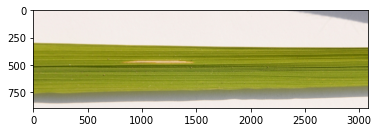

In [3]:
image = plt.imread('/kaggle/input/riceleaf/Data/Bacterial leaf blight-20200814T055237Z-001/Bacterial leaf blight/DSC_0385.jpg')
plt.imshow(image)

In [4]:
image.shape

(897, 3081, 3)

In [5]:
image = []
label = []
img_width = 64
img_height = 164
path = '../input/riceleaf/Data/'

for i in os.listdir(path):
    for j in os.listdir(path+i):
        for k in os.listdir(path+i+'/'+j):
            img = cv2.imread(path+i+'/'+j+'/'+k)
            img = cv2.resize(img, (img_height,img_width))
            label.append(j)
            image.append(img)
        
        
x = np.array(image)
y = np.array(label)

In [6]:
x.shape, y.shape

((119, 64, 164, 3), (119,))

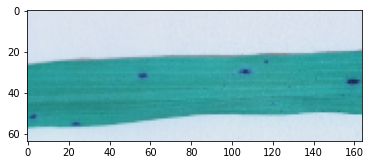

In [7]:
plt.imshow(x[0])

In [8]:
y

array(['Brown spot', 'Brown spot', 'Brown spot', 'Brown spot',
       'Brown spot', 'Brown spot', 'Brown spot', 'Brown spot',
       'Brown spot', 'Brown spot', 'Brown spot', 'Brown spot',
       'Brown spot', 'Brown spot', 'Brown spot', 'Brown spot',
       'Brown spot', 'Brown spot', 'Brown spot', 'Brown spot',
       'Brown spot', 'Brown spot', 'Brown spot', 'Brown spot',
       'Brown spot', 'Brown spot', 'Brown spot', 'Brown spot',
       'Brown spot', 'Brown spot', 'Brown spot', 'Brown spot',
       'Brown spot', 'Brown spot', 'Brown spot', 'Brown spot',
       'Brown spot', 'Brown spot', 'Brown spot', 'Brown spot',
       'Leaf smut', 'Leaf smut', 'Leaf smut', 'Leaf smut', 'Leaf smut',
       'Leaf smut', 'Leaf smut', 'Leaf smut', 'Leaf smut', 'Leaf smut',
       'Leaf smut', 'Leaf smut', 'Leaf smut', 'Leaf smut', 'Leaf smut',
       'Leaf smut', 'Leaf smut', 'Leaf smut', 'Leaf smut', 'Leaf smut',
       'Leaf smut', 'Leaf smut', 'Leaf smut', 'Leaf smut', 'Leaf smut',
       'Le

In [9]:
le = LabelEncoder()

y = le.fit_transform(y)

In [10]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.21,random_state=50,stratify=y)

In [12]:
x_train = x_train/255
x_test = x_test/255

In [13]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape = (64, 164, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(180, activation='relu'))

model.add(Dropout(0.30))

model.add(Dense(3, activation='softmax'))

model.summary()

2022-10-16 17:05:39.978979: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 17:05:40.078798: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 17:05:40.079572: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 17:05:40.081141: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 164, 32)       2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 82, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 82, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 41, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 41, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 41984)             0         
_________________________________________________________________
dense (Dense)                (None, 180)               7

node zero
2022-10-16 17:05:40.082430: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 17:05:40.083291: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 17:05:42.359079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 17:05:42.359990: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-16 17:05:42.360686: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node r

In [14]:
optimizer = RMSprop(learning_rate=0.001, rho=0.8, epsilon=1e-08, decay=0.0)

In [15]:
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [16]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=True,  # randomly flip images
#         vertical_flip=True     # randomly flip images
        )  


datagen.fit(x_train)

In [17]:
x_test.shape, y_test.shape

((25, 64, 164, 3), (25,))

In [18]:
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, save_best_only=True)

history = model.fit(x_train,y_train,epochs = 200, validation_data = (x_test,y_test), callbacks=[checkpointer], verbose = 1, steps_per_epoch=3)

2022-10-16 17:05:43.036461: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-10-16 17:05:44.661751: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


3/3 [==============================] - 8s 155ms/step - loss: 11.6751 - accuracy: 0.2872 - val_loss: 2.1645 - val_accuracy: 0.3200

Epoch 00001: val_loss improved from inf to 2.16454, saving model to model.weights.best.hdf5
Epoch 2/200
3/3 [==============================] - 0s 20ms/step - loss: 1.5385 - accuracy: 0.3404 - val_loss: 1.1374 - val_accuracy: 0.3200

Epoch 00002: val_loss improved from 2.16454 to 1.13737, saving model to model.weights.best.hdf5
Epoch 3/200
3/3 [==============================] - 0s 21ms/step - loss: 1.1120 - accuracy: 0.3936 - val_loss: 1.0094 - val_accuracy: 0.5200

Epoch 00003: val_loss improved from 1.13737 to 1.00938, saving model to model.weights.best.hdf5
Epoch 4/200
3/3 [==============================] - 0s 21ms/step - loss: 1.0409 - accuracy: 0.4681 - val_loss: 0.9917 - val_accuracy: 0.5200

Epoch 00004: val_loss improved from 1.00938 to 0.99174, saving model to model.weights.best.hdf5
Epoch 5/200
3/3 [==============================] - 0s 22ms/step - 

In [19]:
model.load_weights('model.weights.best.hdf5')

In [20]:
model.evaluate(x_test,y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.8528 - accuracy: 0.6000


[0.8528384566307068, 0.6000000238418579]

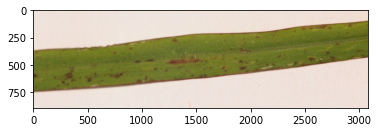

In [21]:
path = '../input/riceleaf/Data/Leaf smut-20200814T055530Z-001/Leaf smut/DSC_0309.JPG'
img=plt.imread(path)
plt.imshow(img)
plt.show()
org_label = 'Leaf smut'

In [22]:
img=cv2.resize(img,(64,164))
img = img/255

In [23]:
x=tf.keras.preprocessing.image.array_to_img(img)
x=np.expand_dims(x,axis=0)

In [24]:
# get predictions on the test set
y_pred = model.predict(x_test)

In [25]:
img_label = ['Bacterial leaf blight','Brown spot','Leaf smut']

In [26]:
pridicted_img=img_label[np.argmax(model.predict(x_test)[0])]
print("Pridicted Label: ",pridicted_img)
print("Original Label: ",org_label)

Pridicted Label:  Leaf smut
Original Label:  Leaf smut
